In [8]:
PATH_TO_DIR= "Taxonomy_Genus_Just_Bacteria"


filename = "output.txt"
asd = "c:"

In [ ]:
%%bash
#!/bin/bash

files=( Taxonomy_Genus_Just_Bacteria/*.fasta )
for((i=0;i<${#files[@]};i+=4)); do
  { 
     mafft  --quiet --retree 1 "${files[$i]}" > "${files[$i]}".aln &
     mafft  --quiet --retree 1 "${files[$i+1]}" > "${files[$i+1]}".aln & 
     mafft  --quiet --retree 1 "${files[$i+2]}" > "${files[$i+2]}".aln & 
     mafft  --quiet --retree 1 "${files[$i+3]}" > "${files[$i+3]}".aln &   
  }
done

In [2]:
print("Lefutott -->  c:")

Lefutott -->  c:


In [20]:
#MERGE______________________________________________________________________
#mostly based on: https://github.com/benhid/pyMSA/blob/master/examples/runner.py
#Modified by: Csatári Dominik 2022.11.14.

from pymsa import MSA, Entropy, PercentageOfNonGaps, PercentageOfTotallyConservedColumns, Star, SumOfPairs
from pymsa import PAM250, Blosum62, FileMatrix
from pymsa.util.fasta import print_alignment
from Bio import SeqIO
from Bio.Seq import Seq

import os


import papermill as pm

import os.path
from os import path


arr_of_scores= []

def run_all_scores(sequences: list,path) -> None:
    
    aligned_sequences = list(pair[1] for pair in sequences)
    sequences_id = list(pair[0] for pair in sequences)

    msa = MSA(aligned_sequences, sequences_id)
    #print_alignment(msa)

    # Percentage of non-gaps and totally conserved columns
    non_gaps = PercentageOfNonGaps(msa)
    totally_conserved_columns = PercentageOfTotallyConservedColumns(msa)

    percentage = non_gaps.compute()

    conserved = totally_conserved_columns.compute()

    # Entropy
    value = Entropy(msa).compute()    

    # Sum of pairs
    #value = SumOfPairs(msa, Blosum62()).compute()
    #value = SumOfPairs(msa, PAM250()).compute()
    #value = SumOfPairs(msa, FileMatrix('PAM380.txt')).compute()
    

    # Star
#    value = Star(msa, Blosum62()).compute()

#    value = Star(msa, PAM250()).compute()
    
    
    
    #file_out = open("Test_results/"+path+"_out.txt", 'w')

    #file_out.write(str(totally_conserved_columns)+str(percentage)+" "+str(conserved)+" "+str(value)+"\n")
    #file_out.close()
    
    #arr_of_scores.append(str(value)+str(percentage)+" "+str(conserved)+" "+str(value))
    arr_of_scores.append((percentage,conserved,value,path))




#______________________________itt kezdődik________________________________________________

f_in = open(PATH_TO_DIR+"/Genus_group_name_WORKING.txt","r")

Lines = f_in.readlines()
Lines = sorted(Lines)
#for line in Lines:
#    File_new = open("Test_results/"+line[:-1], 'w')
#    File_new.close()
 

    
calc =0
marker= False
test_run=1500

only_one=[]
too_big_4_value=[]

MSA_length=[]

for line in Lines:
    too_big_for_test= False
    
        
    if line =="":
        break
        
    calc+=1
    if calc %50==0:
        print("ITT JÁR ---> "+ str(calc))
        
            
    
    
    
    sequences =[]
    
    
    
    #print("Ez mi:   "+str(path.exists(ide)))
    
    ide="Taxonomy_Genus_Just_Bacteria_ALN/"+line[:-1]+".fasta.aln"
    
    if path.exists(ide) ==False:
        print("Path does not exist:"+ PATH_TO_DIR+"/"+line[:-1]+".fasta.aln")
        break
        continue
    else:
        asd=0
        asd2=0
        with open(ide) as input_handle:
            for record in SeqIO.parse(input_handle, "fasta"):

                if len(record.seq) >= 5000:
                    too_big_for_test = True
                    asd=len(record.seq)
                    asd2+=1
                    continue
                    #break
                
                pair = (record.description.split(" ",2)[0], str(record.seq))
                sequences.append(pair)
            
                #--------------------------------
                

        #egy elemű alignmentnek, nincs msa-ja --> nem lehet egy elemű-re meghívni a fv-t
        if len(sequences) !=0 and len(sequences)!=1 and too_big_for_test==False:
            continue
            msa_core =(line[:-1],len(sequences),len(sequences[1][1]))
            
            MSA_length.append(msa_core)
            
            run_all_scores(sequences,line[:-1])
        else:
            if len(sequences) ==1:
                only_one.append(line[:-1])
            elif too_big_for_test ==True:
                too_big_4_value.append((line[:-1],asd2,asd))





#papermill Test_score_model.ipynb -p filename [Acetivibrio]_ethanolgignens_group.fasta


#"Taxonomy_Genus_Just_Bacteria_ALN/"+line[:-1]+".fasta.aln"


ITT JÁR ---> 50
ITT JÁR ---> 100
ITT JÁR ---> 150
ITT JÁR ---> 200
ITT JÁR ---> 250
ITT JÁR ---> 300
ITT JÁR ---> 350
ITT JÁR ---> 400
ITT JÁR ---> 450
ITT JÁR ---> 500
ITT JÁR ---> 550
ITT JÁR ---> 600
ITT JÁR ---> 650
ITT JÁR ---> 700
ITT JÁR ---> 750
ITT JÁR ---> 800
ITT JÁR ---> 850
ITT JÁR ---> 900
ITT JÁR ---> 950
ITT JÁR ---> 1000
ITT JÁR ---> 1050
ITT JÁR ---> 1100
ITT JÁR ---> 1150
ITT JÁR ---> 1200
ITT JÁR ---> 1250
ITT JÁR ---> 1300
ITT JÁR ---> 1350
ITT JÁR ---> 1400
ITT JÁR ---> 1450
ITT JÁR ---> 1500
ITT JÁR ---> 1550
ITT JÁR ---> 1600
ITT JÁR ---> 1650
ITT JÁR ---> 1700
ITT JÁR ---> 1750
ITT JÁR ---> 1800
ITT JÁR ---> 1850
ITT JÁR ---> 1900
ITT JÁR ---> 1950
ITT JÁR ---> 2000
ITT JÁR ---> 2050
ITT JÁR ---> 2100
ITT JÁR ---> 2150
ITT JÁR ---> 2200
ITT JÁR ---> 2250
ITT JÁR ---> 2300
ITT JÁR ---> 2350
ITT JÁR ---> 2400
ITT JÁR ---> 2450
ITT JÁR ---> 2500
ITT JÁR ---> 2550
ITT JÁR ---> 2600
ITT JÁR ---> 2650
ITT JÁR ---> 2700
ITT JÁR ---> 2750
ITT JÁR ---> 2800
ITT JÁR --->

In [4]:
#General score, újra futattaja a hosszabb futást igénylő Genusokat

def general_scoring(arr_2_score):
    counting=0
    
    for e in arr_2_score:
        
        if e =="":
            break

        counting+=1

        if counting %50==0:
            print("ITT JÁR ---> "+ str(counting))

        sequences =[]

        if path.exists(PATH_TO_DIR+"/"+e+".fasta.aln") ==False:
            print("Path does not exist:"+ PATH_TO_DIR+"/"+e+".fasta.aln")

        else:
            with open(PATH_TO_DIR+"/"+e+".fasta.aln") as input_handle:
                for record in SeqIO.parse(input_handle, "fasta"):

                    pair = (record.description.split(" ",2)[0], str(record.seq))
                    sequences.append(pair)

                    #--------------------------------


            #egy elemű alignmentnek, nincs msa-ja --> nem lehet egy elemű-re meghívni a fv-t
            if len(sequences) !=0 and len(sequences)!=1:
                print("Scoring előtt seq-hossz:  "+ str(len(sequences[0][1])))
                print("Ennyi seq az MSA-ban:" + str(len(sequences)))
                run_all_scores(sequences,e)
                print(str(counting) +".dik MSA-t beolvasta")
            else:
                if len(sequences) ==1:
                    only_one.append(e)






In [23]:
#Újra hívjuk azokra amikre túl sokaig tartott:
for i in too_big_4_value:
    print(str(i[0])+" "+str(i[1])+" "+str(i[2])+" ")

Acinetobacter 3378 6489 
Allorhizobium_Neorhizobium_Pararhizobium_Rhizobium 1832 5467 
Bacillus 15700 26296 
Burkholderia_Caballeronia_Paraburkholderia 2880 5298 
Corynebacterium 3609 5126 
Enterobacter 2404 7382 
Escherichia_Shigella 7667 8103 
None 94831 66797 
Paenibacillus 2903 5337 
Pseudomonas 9234 17110 
Staphylococcus 6416 13225 
Streptococcus 7073 14781 
Streptomyces 6717 8906 
UNKNOWN 22137 18995 
Vibrio 3893 6608 


In [17]:
print(len(arr_of_scores))
print(len(only_one))
#össz 3269
#alkalmazott: 3123
#diff: 146

3123
131


In [7]:
print(MSA_length[0:20])
copy_MSA= MSA_length

[]


In [8]:
x=[]
y=[]
z=[]
for b in arr_of_scores:
    x.append(b[0])
    y.append(b[1])
    z.append(b[2])
    

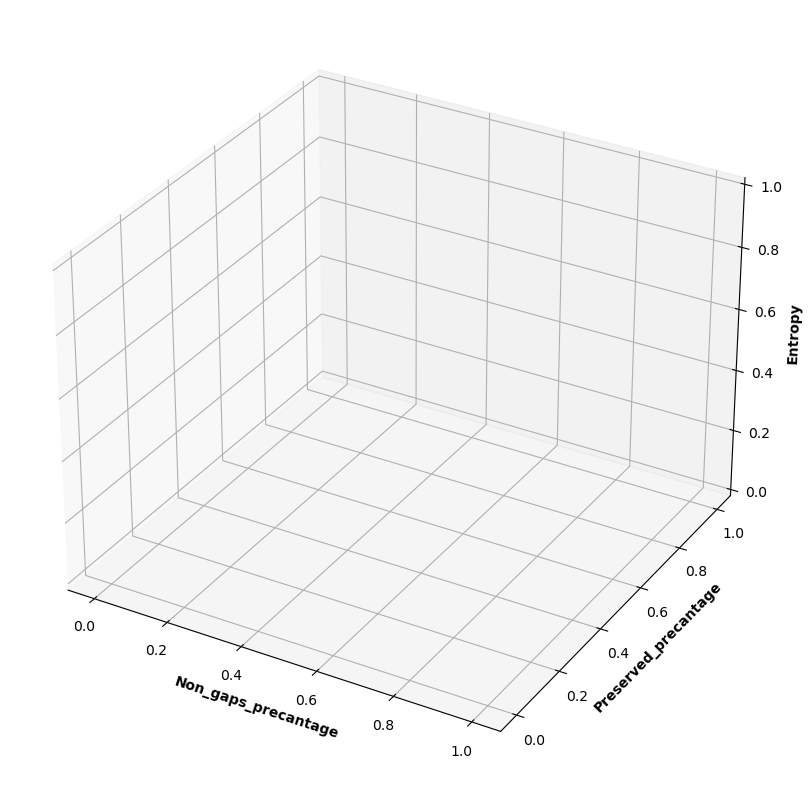

In [9]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=z, alpha=1)
ax.set_xlabel('Non_gaps_precantage', fontweight ='bold')
ax.set_ylabel('Preserved_precantage', fontweight ='bold')
ax.set_zlabel('Entropy', fontweight ='bold')

#ax.view_init(0,90)


plt.show()

0


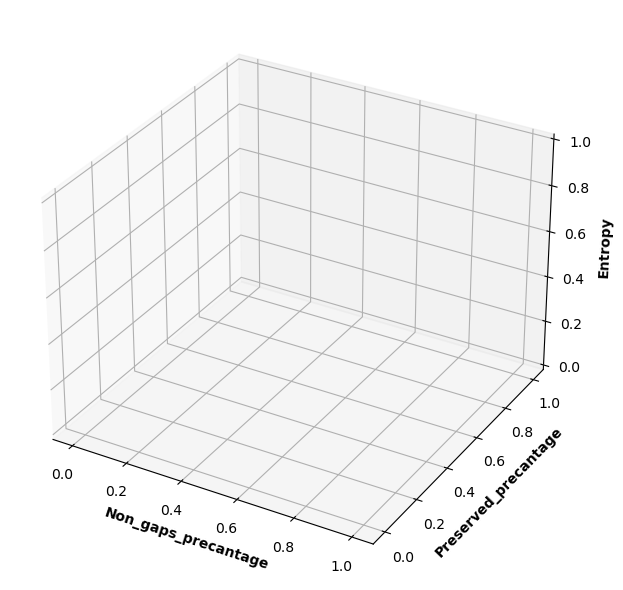

In [10]:
# szelektálva-------------------------

x=[]
y=[]
z=[]
s_=0

c=0
for b in arr_of_scores:
    if c>=len(arr_of_scores)-12:
        s_+=1
        x.append(b[0])
        y.append(b[1])
        z.append(b[2])
    c+=1

print(s_)        
#-------------------------------------------------------        
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=z, alpha=1)
ax.set_xlabel('Non_gaps_precantage', fontweight ='bold')
ax.set_ylabel('Preserved_precantage', fontweight ='bold')
ax.set_zlabel('Entropy', fontweight ='bold')


#ax.view_init(0, 90)

plt.show()

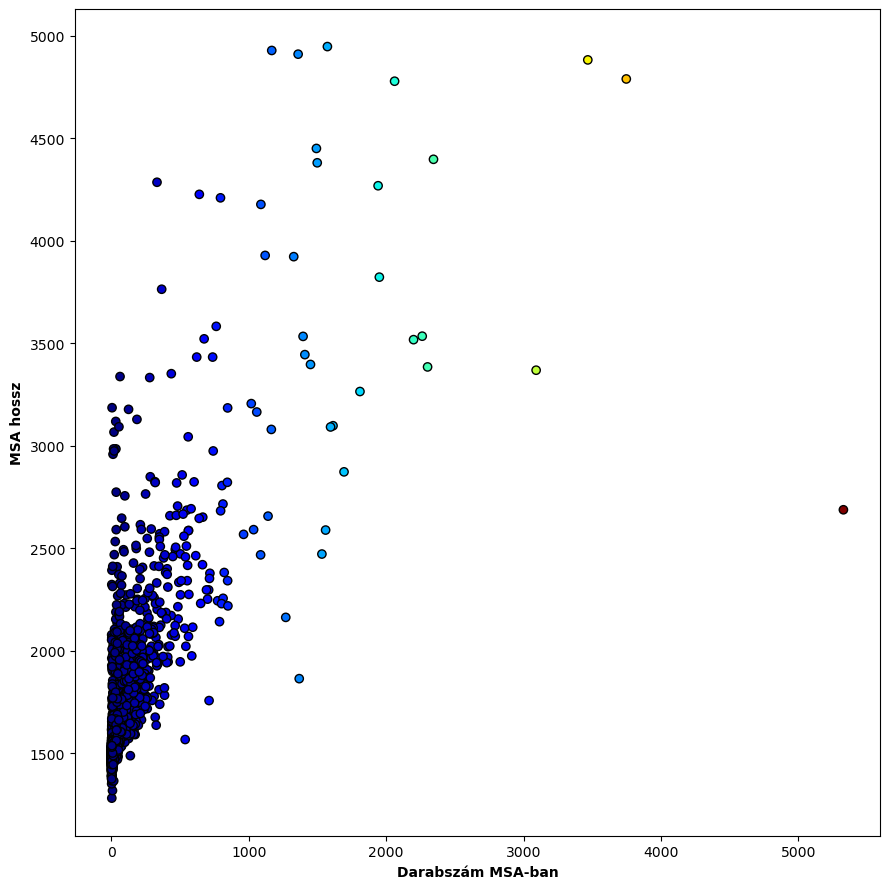

In [62]:
#----------HISTOGRAM-------------------------------
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

x=[]
y=[]

for a in MSA_length:
    x.append(a[1])
    y.append(a[2])

    
fig, ax = plt.subplots(figsize = (9, 9))
    

ax.scatter(x, y,c=x, edgecolor='k',cmap='jet')

ax.set_xlabel('Darabszám MSA-ban', fontweight ='bold')
ax.set_ylabel('MSA hossz', fontweight ='bold')

b, a = np.polyfit(x, y, deg=1)


xseq = np.linspace(0,2, num=5000)


ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

#plt.show()


ValueError: Could not interpret value `total_bill` for parameter `x`

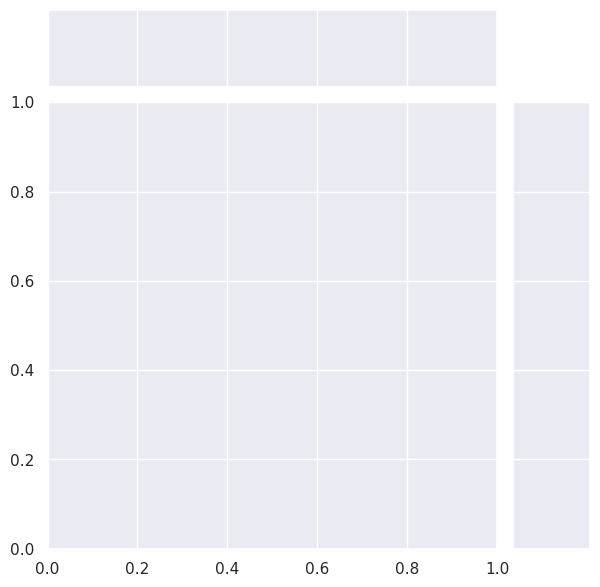

In [5]:
import seaborn as sns

sns.set_theme(style="darkgrid")

tips = sns.load_dataset("penguins")


g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [12]:
#---fájlba kiírja arr_of_scores-t
f_out_scores = open("MSA_scores",'w')

for score in arr_of_scores:
    f_out_scores.write(str(score[0])+" "+str(score[1])+" "+str(score[2])+" "+str(score[3]) )
    f_out_scores.write("\n")
f_out_scores.close()


In [60]:
f_out = open("MSA_core_data",'w')

for data in MSA_length:
    f_out.write(str(data[0])+" "+str(data[1])+" "+str(data[2]))
    f_out.write("\n")
f_out.close()
